#### Testing out how both techniques are used in financial markets
Follow along to this blog: [https://pythonforfinance.net/2019/05/30/python-monte-carlo-vs-bootstrapping/]

In [2]:
import pandas as pd
import numpy as np
from functools import reduce
import pandas_datareader.data as web
import datetime
import random
import matplotlib.pyplot as plt
import matplotlib as mpl
%matplotlib inline
mpl.style.use('ggplot')
figsize=(15,8)

In [3]:
start,end = datetime.datetime(2009,12,30),datetime.datetime(2019,5,29)
tickers = ["^DJI","^IXIC","^GSPC","^STOXX50E","^N225","^GDAXI"]

asset_universe = pd.DataFrame([web.DataReader(ticker,'yahoo',start,end).loc[:,'Adj Close'] for ticker in tickers],
                             index = tickers).T.fillna(method='ffill')
asset_universe = asset_universe/asset_universe.iloc[0,:]

<AxesSubplot:xlabel='Date'>

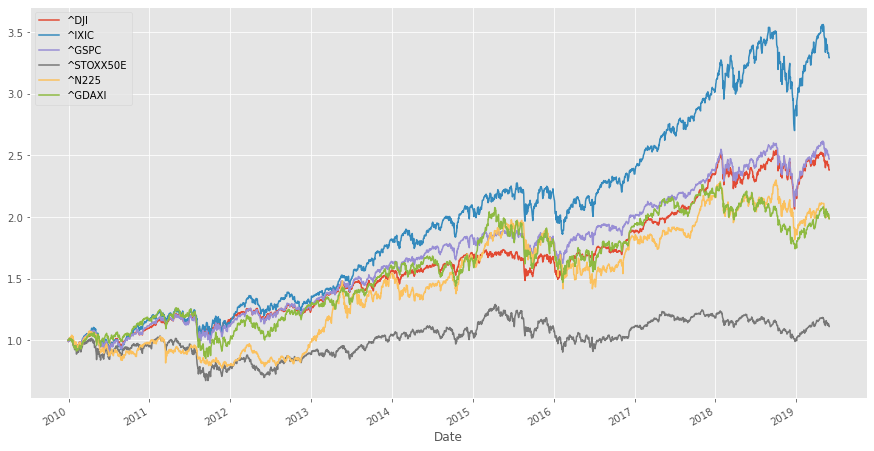

In [4]:
asset_universe.plot(figsize=figsize)

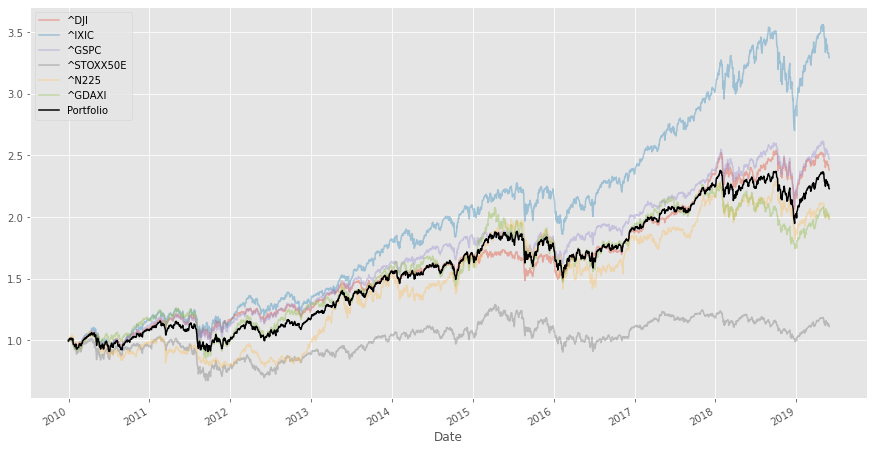

In [7]:
portfolio_returns = asset_universe.pct_change().dropna().mean(axis=1)
portfolio = (asset_universe.pct_change().dropna().mean(axis=1)+1).cumprod()

asset_universe.plot(figsize=figsize,alpha=0.4)
portfolio.plot(label='Portfolio',color='black')
plt.legend()
plt.show()

In [9]:
portfolio_bootstrapping = (1+pd.DataFrame([random.choices(list(
portfolio_returns.values),k = 252) for i in range(1000)]).T.shift(1).fillna(0).cumprod())


<AxesSubplot:>

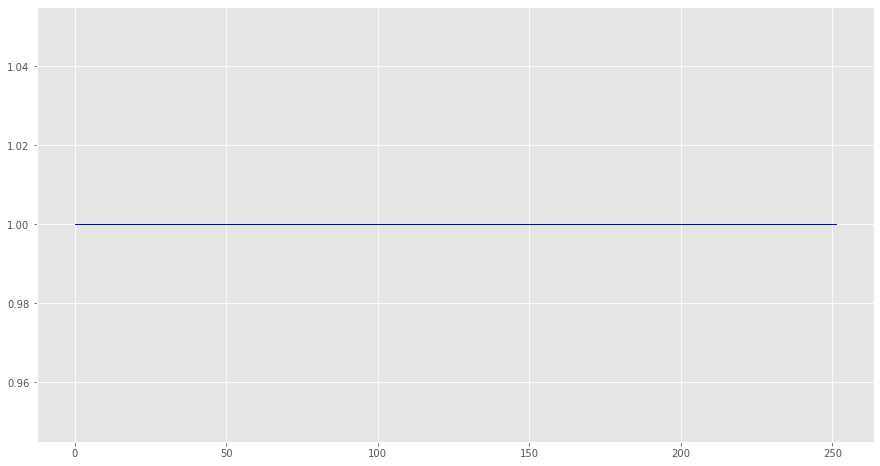

In [11]:
portfolio_bootstrapping.plot(figsize=figsize,legend=False,linewidth=1,alpha=0.2,
                            color='b')

<AxesSubplot:>

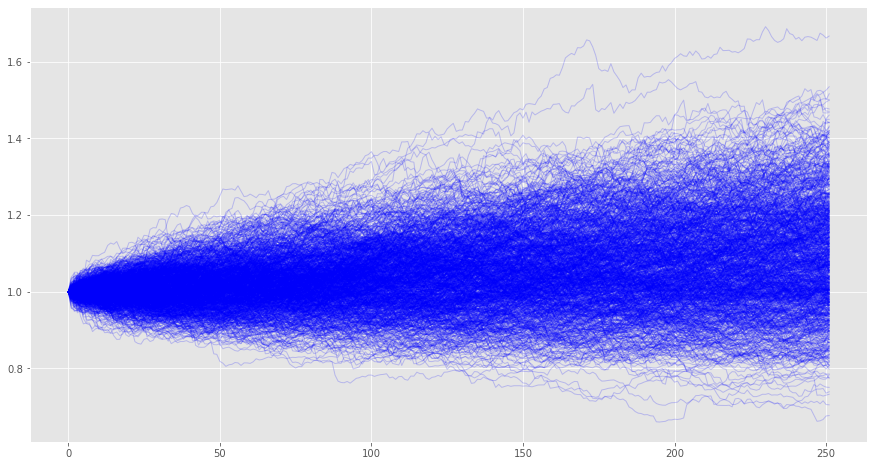

In [12]:
portfolio_bootstrapping = (1+pd.DataFrame([random.choices(list(
    portfolio_returns.values), k=252) for i in 
    range(1000)]).T.shift(1).fillna(0)).cumprod()

portfolio_bootstrapping.plot(figsize=figsize, legend=False, linewidth=1, alpha=0.2, color='b')

<AxesSubplot:>

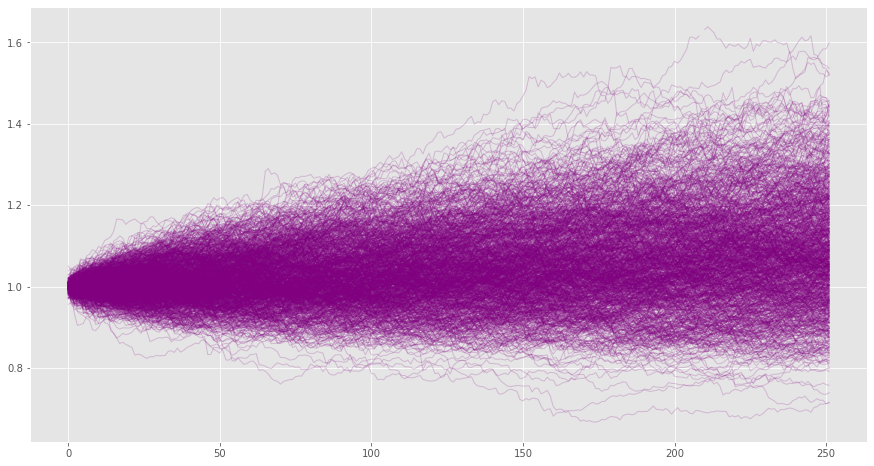

In [14]:
asset_universe_returns = asset_universe.pct_change()
portfolio_constituents_bootstrapping =pd.DataFrame([((asset_universe_returns.iloc[random.choices(range(len(asset_universe)),
                                                          k=252)]).mean(axis = 1)+1).cumprod().values
             for x in range(1000)]).T
portfolio_constituents_bootstrapping.plot(figsize=figsize,legend=False,
                                         linewidth=1, alpha=0.2,color='purple')

In [15]:
mu = portfolio_returns.mean()
sigma = portfolio_returns.std()

print(f'Our portfolio mean return value is {round(mu*100,2)}%')
print(f'Our portfolio standard div is {round(sigma*100,2)}%')

Our portfolio mean return value is 0.04%
Our portfolio standard div is 0.86%


<AxesSubplot:>

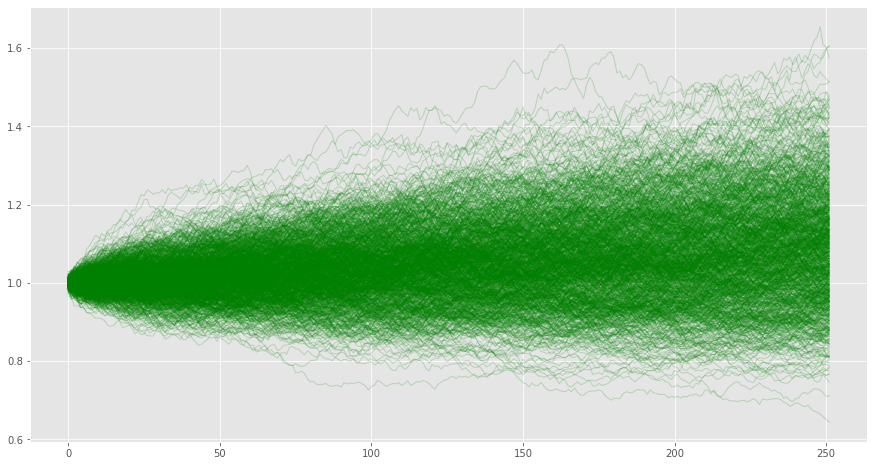

In [17]:
portfolio_mc = pd.DataFrame([(np.random.normal(loc=mu,scale=sigma,
                                              size = 252)+1) for x in range(1000)]).T.cumprod()
portfolio_mc.plot(figsize=figsize,legend=False, linewidth = 1, alpha=0.2
                , color = 'green')

In [18]:
for asset in (asset_universe_returns.mean() * 100).round(2).index:
    print(f'The mean return for {asset} is {(asset_universe_returns.mean() * 100).round(2) [asset]}%')
print('\n')

for asset in (asset_universe_returns.std() * 100).round(2).index:
    print(f'The mean return for {asset} is {(asset_universe_returns.std() * 100).round(2)[asset]}%')

The mean return for ^DJI is 0.04%
The mean return for ^IXIC is 0.05%
The mean return for ^GSPC is 0.04%
The mean return for ^STOXX50E is 0.01%
The mean return for ^N225 is 0.04%
The mean return for ^GDAXI is 0.04%


The mean return for ^DJI is 0.88%
The mean return for ^IXIC is 1.06%
The mean return for ^GSPC is 0.92%
The mean return for ^STOXX50E is 1.25%
The mean return for ^N225 is 1.29%
The mean return for ^GDAXI is 1.19%


In [20]:
asset_returns_dfs=[]
for asset in asset_universe_returns.mean().index:
    mu = asset_universe_returns.mean()[asset]
    sigma = asset_universe_returns.std()[asset]
    asset_mc_rets= pd.DataFrame([(np.random.normal(loc=mu,
                                                  scale = sigma,
                                                  size= 252))
                                for x in range(1000)]).T
    asset_returns_dfs.append(asset_mc_rets)

In [22]:
weighted_asset_returns_dfs = [(returns_df/len(tickers)) for
                             returns_df in asset_returns_dfs]

In [23]:
portfolio_constituents_mc = (reduce(lambda x,y:x+y,weighted_asset_returns_dfs)+1).cumprod()

<AxesSubplot:>

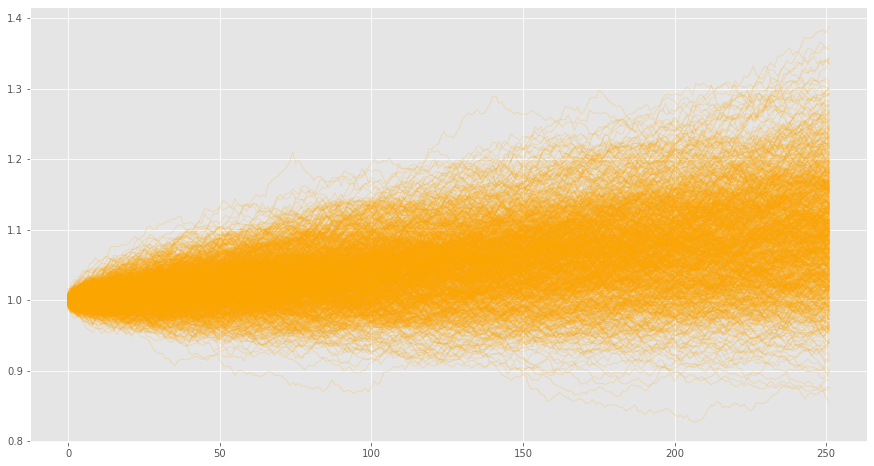

In [24]:
portfolio_constituents_mc.plot(figsize=figsize,legend=False,
                              linewidth=1,alpha=0.2, color='orange')

In [ ]:
ax,figsize = plt.sublots(figsize(12,10))

sns.heatman(a)